In [126]:
import pandas as pd

df = pd.read_csv("NSE2.csv")
df.tail()

df = df[['Date','Price']]
df

,Date,Price
0,18-10-2024,"98,070.47"
1,17-10-2024,"98,081.38"
2,16-10-2024,"98,291.53"
3,15-10-2024,"98,540.93"
4,14-10-2024,"98,215.13"
...,...,...
1823,07-06-2017,"32,686.72"
1824,06-06-2017,"32,200.38"
1825,05-06-2017,"32,578.38"
1826,02-06-2017,"31,371.63"


In [127]:

# Step 1: Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # Adjust format if necessary

# Step 2: Clean and convert 'Price' from string with commas to float
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Step 3: Set 'Date' as the index
df.set_index('Date', inplace=True)

# Step 4: Ensure the index is sorted (if needed)
df = df.sort_index()

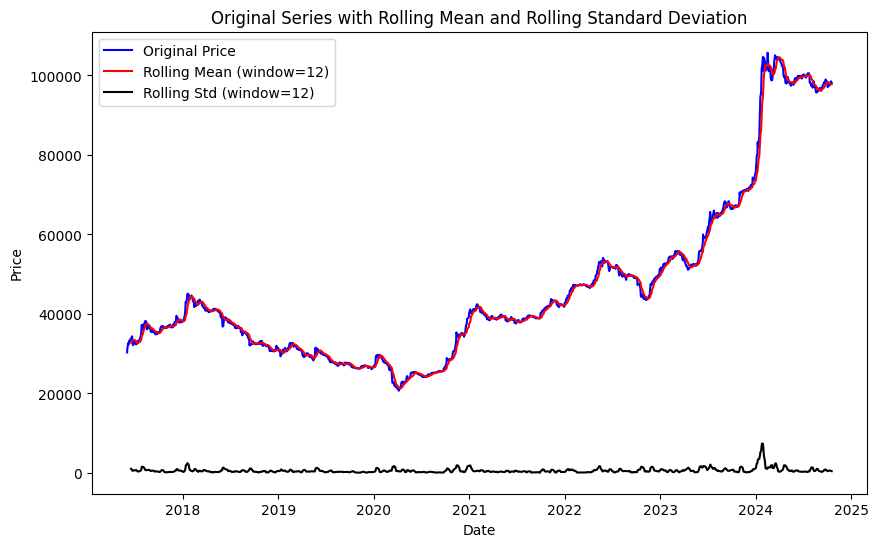

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'df' is your DataFrame and 'Price' is the column you're analyzing
# If it's not Price, change it to the column you're working with

# Define a window size (for example, 12 for a yearly window if you have monthly data)
window_size = 12

# Calculate the rolling mean and rolling standard deviation
rolling_mean = df['Price'].rolling(window=window_size).mean()
rolling_std = df['Price'].rolling(window=window_size).std()

# Plot the original series, rolling mean, and rolling std deviation
plt.figure(figsize=(10,6))
plt.plot(df['Price'], label='Original Price', color='blue')
plt.plot(rolling_mean, label=f'Rolling Mean (window={window_size})', color='red')
plt.plot(rolling_std, label=f'Rolling Std (window={window_size})', color='black')
plt.title('Original Series with Rolling Mean and Rolling Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


               Price
Date                
2017-06-01  30314.14
2017-06-02  31371.63
2017-06-05  32578.38
2017-06-06  32200.38
2017-06-07  32686.72


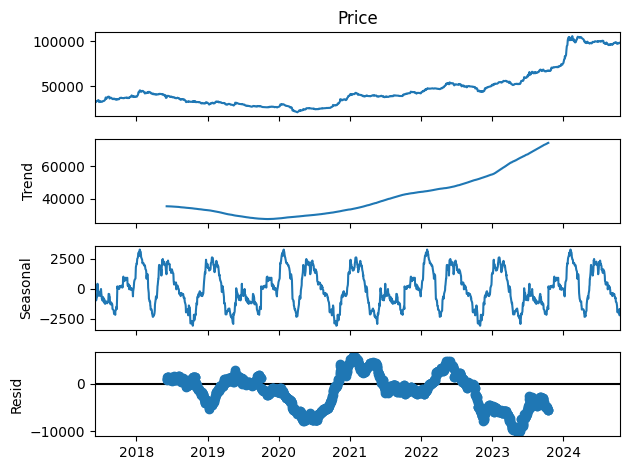

In [129]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


# Step 5: Print the cleaned data (optional)
print(df.head())
# Step 6: Decompose the time series using an additive model
decomposition = seasonal_decompose(df['Price'], model='additive', period=500)  # Adjust period as per your data (e.g., 12 for monthly data, 365 for daily data with yearly seasonality)

# Step 7: Plot the decomposition
decomposition.plot()
plt.show()


In [130]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: 0.6992264089894303
p-value: 0.9898224186224239
Critical Values: {'1%': -3.4339520666978056, '5%': -2.8631311116872475, '10%': -2.567617054512932}


In [131]:
# df['Price_seasonal_diff'] = df['Price'].diff(periods=12).dropna()
# result_seasonal_diff = adfuller(df['Price_seasonal_diff'].dropna())
# print('ADF Statistic (Seasonally Differenced):', result_seasonal_diff[0])


In [132]:
# df['Price_seasonal_diff'] = df['Price'].diff(periods=12).dropna()
# result_seasonal_diff = adfuller(df['Price_seasonal_diff'].dropna())
# print('ADF Statistic (Seasonally Differenced):', result_seasonal_diff[0])


In [133]:
df['Price_diff'] = df['Price'].diff().dropna()
result_diff = adfuller(df['Price_diff'].dropna())
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])


ADF Statistic (Differenced): -10.385342811598907
p-value (Differenced): 2.087104338599352e-18


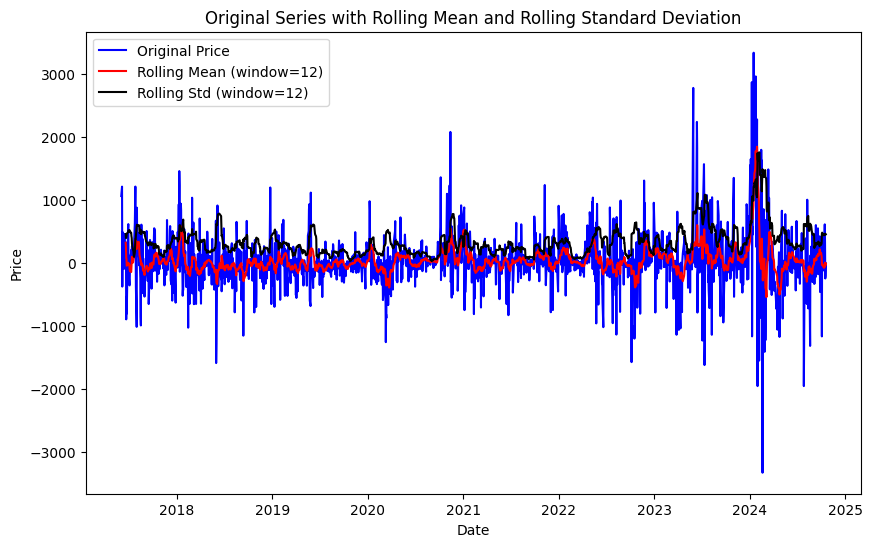

In [134]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'df' is your DataFrame and 'Price' is the column you're analyzing
# If it's not Price, change it to the column you're working with

# Define a window size (for example, 12 for a yearly window if you have monthly data)
window_size = 12

# Calculate the rolling mean and rolling standard deviation
rolling_mean = df['Price_diff'].rolling(window=window_size).mean()
rolling_std = df['Price_diff'].rolling(window=window_size).std()

# Plot the original series, rolling mean, and rolling std deviation
plt.figure(figsize=(10,6))
plt.plot(df['Price_diff'], label='Original Price', color='blue')
plt.plot(rolling_mean, label=f'Rolling Mean (window={window_size})', color='red')
plt.plot(rolling_std, label=f'Rolling Std (window={window_size})', color='black')
plt.title('Original Series with Rolling Mean and Rolling Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Autocorrelation Function (ACF) values:
[ 1.          0.26179462  0.11839793  0.1109589   0.12213969  0.13264605
  0.1126691   0.09946351  0.05312527  0.1038283   0.08697549  0.0481756
  0.06320687  0.0430556   0.07369887  0.0165915   0.05894618  0.05199751
  0.03460312  0.01246014 -0.01364457 -0.00347308 -0.02774139 -0.00302039
 -0.02520741 -0.01822235  0.01085024 -0.02061389  0.0183588  -0.01151293
 -0.00367243  0.00442698 -0.00371038 -0.01230855  0.02847172  0.04255121
  0.03399034  0.02829015  0.00209405  0.03483796  0.00873389]

Partial Autocorrelation Function (PACF) values:
[ 1.          0.26193799  0.05359329  0.07291839  0.07791967  0.0799416
  0.04940522  0.04093098 -0.00848942  0.0677755   0.02200109 -0.00893245
  0.02566624 -0.00454194  0.03946601 -0.03739493  0.03957783  0.01305921
 -0.00199065 -0.02211353 -0.03270929 -0.01462688 -0.03840061 -0.0019558
 -0.02599983 -0.00349149  0.0199767  -0.02009847  0.03477457 -0.01059519
  0.00282011  0.01385557 -0.00394655 -0.01034384  

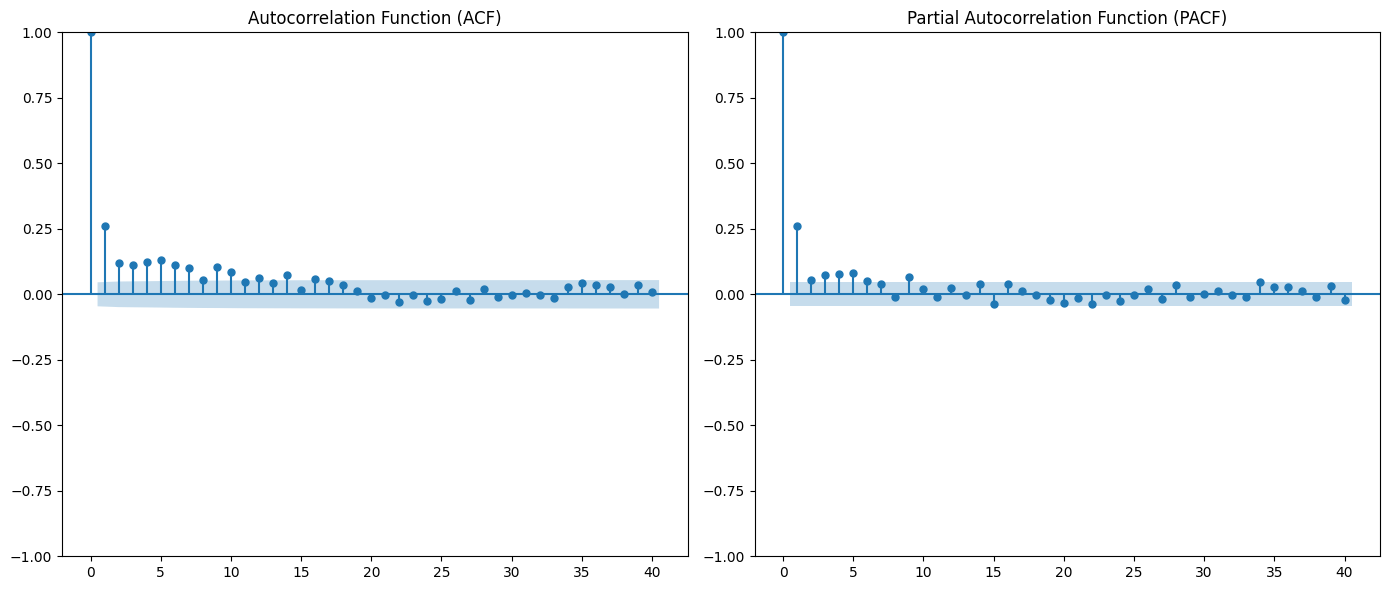

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

# Assuming 'df' is your DataFrame and 'Price' is the column you're analyzing
data = df['Price_diff'].dropna()

# Calculate ACF and PACF values
acf_values = acf(data, nlags=40)
pacf_values = pacf(data, nlags=40)

# Print ACF and PACF values
print("Autocorrelation Function (ACF) values:")
print(acf_values)
print("\nPartial Autocorrelation Function (PACF) values:")
print(pacf_values)

# Plot ACF and PACF
plt.figure(figsize=(14, 6))

# ACF Plot
plt.subplot(121)
plot_acf(data, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# PACF Plot
plt.subplot(122)
plot_pacf(data, lags=40, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [136]:
!pip install pmdarima

In [137]:
# Define the train set
train_size = int(len(df) * 0.8)
train = df[:train_size]


In [ ]:
from pmdarima import auto_arima

# Fit auto ARIMA model
model_auto = auto_arima(train['Price_diff'].dropna(), seasonal=False, stepwise=True,
                         suppress_warnings=True, trace=True)

# Summary of the best model
print(model_auto.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=21013.130, Time=2.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=21087.200, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=21021.656, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=21030.397, Time=1.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=21012.085, Time=1.68 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=21020.990, Time=2.17 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=21017.560, Time=3.26 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=21012.486, Time=4.68 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=21022.601, Time=1.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=21011.198, Time=2.72 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=21019.077, Time=0.86 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=21013.067, Time=6.35 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=21020.847, Time=0.83 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=21012.836, Time=5.85 sec


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error



# Drop duplicates based on the Dat
# Define the ARIMA model using all available data
model = ARIMA(df['Price_diff'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecasting for the future dates
# You can specify how many steps ahead you want toa predict
forecast_steps = 120  # Change as needed
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')  # Business days

# Generate predictions for the future
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price_diff'], label='Actual Prices', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecasted Prices', color='red')

# Plot confidence intervals
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.5)

plt.title('ARIMA Model - Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# If you have actual future values to compare against, you can calculate RMSE
# For demonstration, let's assume we have actual future prices
# actual_future_prices = ...  # Load your actual future prices here


In [ ]:
# Generate predictions for the historical data
predicted_values = model_fit.predict(start=len(df['Price_diff']) - forecast_steps, end=len(df['Price_diff']) - 1)
actual_values = df['Price_diff'].iloc[-forecast_steps:]
# Calculate residuals
residuals = actual_values - predicted_values

# Calculate MSE
mse = mean_squared_error(actual_values, predicted_values)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
ss_total = ((actual_values - actual_values.mean()) ** 2).sum()
ss_residual = ((actual_values - predicted_values) ** 2).sum()
r_squared = 1 - (ss_residual / ss_total)
print(f'R-squared: {r_squared}')

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='orange')
plt.axhline(0, color='black', linestyle='--', lw=2)
plt.title('Residuals of the ARIMA Model')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Histogram of residuals
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='grey')
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from pmdarima import auto_arima

# Fit auto ARIMA model
model_auto = auto_arima(df['Price_diff'].dropna() , seasonal=False, stepwise=True, suppress_warnings=True)

# Summary of the best model
print(model_auto.summary())


In [ ]:
import pandas as pd
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Sample DataFrame with a date index
df = pd.DataFrame({
    'Price_diff': [1, 2, 3, 4, 5]
}, index=pd.date_range(start='2023-01-01', periods=5, freq='B'))

# Set frequency (if not set already)
df.index = pd.to_datetime(df.index)  # Ensure the index is datetime
df = df.asfreq('B')  # Setting frequency to business days

# Initial model fitting (for demonstration)
initial_model = SARIMAX(df['Price_diff'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 5))
initial_results = initial_model.fit()
print("Initial Model Summary:")
print(initial_results.summary())

# Define the parameter ranges for hyperparameter tuning
p = range(0, 3)  # AR terms
d = range(0, 2)  # Differencing
q = range(0, 3)  # MA terms
P = range(0, 2)  # Seasonal AR terms
D = range(0, 2)  # Seasonal Differencing
Q = range(0, 2)  # Seasonal MA terms
s = 5  # Seasonal period (set to 5 for the example)

# Generate all combinations of parameters
param_combinations = list(itertools.product(p, d, q, P, D, Q))

best_aic = float("inf")
best_order = None
best_mdl = None

# Iterate through all combinations of parameters
for param in param_combinations:
    try:
        model = SARIMAX(df['Price_diff'], order=(param[0], param[1], param[2]),
                        seasonal_order=(param[3], param[4], param[5], s))
        results = model.fit()

        # Compare AIC with the best found so far
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = param
            best_mdl = results

    except Exception as e:
        print(f"Error with parameters {param}: {e}")

# Print the best parameters and model summary
print(f"\nBest AIC: {best_aic}")
print(f"Best Order: {best_order}")
if best_mdl:
    print("\nBest Model Summary:")
    print(best_mdl.summary())


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Sample DataFrame with a date index (Replace this with your actual DataFrame)
df = pd.DataFrame({
    'Price_diff': [1, 2, 3, 4, 5]
}, index=pd.date_range(start='2024-10-20', periods=5, freq='B'))

# Ensure the index is datetime and set frequency (if not set already)
df.index = pd.to_datetime(df.index)  # Ensure the index is datetime
df = df.asfreq('B')  # Set frequency to business days

# Define the SARIMAX model using all available data
model = SARIMAX(df['Price_diff'], order=(2,1,1), seasonal_order=(1,0,0,5))  # Adjust seasonal_order if needed
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecasting for the future dates
forecast_steps = 120  # Change as needed
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')  # Business days

# Generate predictions for the future
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price_diff'], label='Actual Prices', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecasted Prices', color='red')

# Plot confidence intervals
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.5)

plt.title('SARIMAX Model - Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# If you have actual future values to compare against, you can calculate RMSE
# For demonstration, let's assume we have actual future prices
# actual_future_prices = ...  # Load your actual future prices here
# rmse = mean_squared_error(actual_future_prices, forecast_values)
# print(f'RMSE: {rmse}')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming df is your DataFrame and you've already fitted your SARIMAX model
# Replacing this with your actual data loading process

# Fitting SARIMAX model (for reference)
model = SARIMAX(df['Price_diff'], order=(2, 1, 1), seasonal_order=(1, 0, 0, 5))
model_fit = model.fit()

# Generate predictions on the training data
predictions = model_fit.fittedvalues

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(df['Price_diff'], predictions)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared (R²)
# Total Sum of Squares (SST)
sst = np.sum((df['Price_diff'] - np.mean(df['Price_diff'])) ** 2)
# Residual Sum of Squares (SSR)
ssr = np.sum((df['Price_diff'] - predictions) ** 2)
# R² Calculation
r_squared = 1 - (ssr / sst)
print(f'R-squared: {r_squared}')

# Calculate Residuals
residuals = df['Price_diff'] - predictions

# Plot Residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='blue')
plt.axhline(0, color='red', linestyle='--')  # Line at zero for reference
plt.title('Residuals of the SARIMAX Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()
